In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [32]:
df =pd.read_csv("https://data.cdc.gov/api/views/4juz-x2tp/rows.csv?accessType=DOWNLOAD",encoding='latin-1')

In [33]:
df.head()

,YEAR,LocationAbbr,LocationDesc,TopicType,TopicDesc,MeasureDesc,DataSource,Response,Data_Value_Unit,Data_Value_Type,...,GeoLocation,TopicTypeId,TopicId,MeasureId,StratificationID1,StratificationID2,StratificationID3,StratificationID4,SubMeasureID,DisplayOrder
0,2004,OH,Ohio,Tobacco Use â Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,"(40.060210141, -82.404260056)",BEH,106BEH,166SSA,1GEN,8AGE,6RAC,1EDU,YTS08,8
1,2008,AL,Alabama,Tobacco Use â Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,"(32.840571122, -86.631860762)",BEH,106BEH,166SSA,3GEN,8AGE,6RAC,2EDU,YTS08,8
2,2015,WV,West Virginia,Tobacco Use â Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Frequent,%,Percentage,...,"(38.665510202, -80.712640135)",BEH,151BEH,169USS,2GEN,8AGE,6RAC,2EDU,YTS12,12
3,2005,IL,Illinois,Tobacco Use â Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,"(40.485010283, -88.997710178)",BEH,106BEH,166SSA,1GEN,8AGE,6RAC,1EDU,YTS08,8
4,2005,CT,Connecticut,Tobacco Use â Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Ever,%,Percentage,...,"(41.56266102, -72.649840952)",BEH,151BEH,169USS,2GEN,8AGE,6RAC,2EDU,YTS11,11


In [9]:
# Check for missing values
print(df.isnull().sum())

INDICATOR            0
PANEL                0
PANEL_NUM            0
UNIT                 0
UNIT_NUM             0
STUB_NAME            0
STUB_NAME_NUM        0
STUB_LABEL           0
STUB_LABEL_NUM       0
YEAR                 0
YEAR_NUM             0
AGE                  0
AGE_NUM              0
ESTIMATE           461
SE                 461
FLAG              2516
dtype: int64


In [11]:
# Display summary of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   INDICATOR       3360 non-null   object 
 1   PANEL           3360 non-null   object 
 2   PANEL_NUM       3360 non-null   int64  
 3   UNIT            3360 non-null   object 
 4   UNIT_NUM        3360 non-null   int64  
 5   STUB_NAME       3360 non-null   object 
 6   STUB_NAME_NUM   3360 non-null   int64  
 7   STUB_LABEL      3360 non-null   object 
 8   STUB_LABEL_NUM  3360 non-null   float64
 9   YEAR            3360 non-null   object 
 10  YEAR_NUM        3360 non-null   int64  
 11  AGE             3360 non-null   object 
 12  AGE_NUM         3360 non-null   float64
 13  ESTIMATE        2899 non-null   float64
 14  SE              2899 non-null   float64
 15  FLAG            844 non-null    object 
dtypes: float64(4), int64(4), object(8)
memory usage: 420.1+ KB
None


In [13]:
df = df.dropna()  # Drop rows with missing values

In [15]:
print(df.dtypes)

INDICATOR          object
PANEL              object
PANEL_NUM           int64
UNIT               object
UNIT_NUM            int64
STUB_NAME          object
STUB_NAME_NUM       int64
STUB_LABEL         object
STUB_LABEL_NUM    float64
YEAR               object
YEAR_NUM            int64
AGE                object
AGE_NUM           float64
ESTIMATE          float64
SE                float64
FLAG               object
dtype: object


In [19]:
print(df.columns)

Index(['INDICATOR', 'PANEL', 'PANEL_NUM', 'UNIT', 'UNIT_NUM', 'STUB_NAME',
       'STUB_NAME_NUM', 'STUB_LABEL', 'STUB_LABEL_NUM', 'YEAR', 'YEAR_NUM',
       'AGE', 'AGE_NUM', 'ESTIMATE', 'SE', 'FLAG'],
      dtype='object')


In [21]:
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces
print(df.columns)

Index(['INDICATOR', 'PANEL', 'PANEL_NUM', 'UNIT', 'UNIT_NUM', 'STUB_NAME',
       'STUB_NAME_NUM', 'STUB_LABEL', 'STUB_LABEL_NUM', 'YEAR', 'YEAR_NUM',
       'AGE', 'AGE_NUM', 'ESTIMATE', 'SE', 'FLAG'],
      dtype='object')


In [23]:
# Convert columns to numeric if necessary (for example 'PANEL_NUM')
df['PANEL_NUM'] = pd.to_numeric(df['PANEL_NUM'], errors='coerce')

In [25]:
# Summary statistics
print(df.describe())

        PANEL_NUM    UNIT_NUM  STUB_NAME_NUM  STUB_LABEL_NUM    YEAR_NUM  \
count  383.000000  383.000000     383.000000      383.000000  383.000000   
mean     3.772846    1.642298       4.302872        4.136723    9.292428   
std      1.767388    0.479951       1.354522        1.524635    2.071527   
min      1.000000    1.000000       1.000000        1.100000    1.000000   
25%      2.000000    1.000000       3.500000        3.121000   10.000000   
50%      4.000000    2.000000       4.000000        3.250000   10.000000   
75%      5.000000    2.000000       6.000000        6.120000   10.000000   
max      6.000000    2.000000       6.000000        6.260000   10.000000   

          AGE_NUM    ESTIMATE          SE  
count  383.000000  383.000000  383.000000  
mean     1.105483   26.704961    1.333681  
std      0.192792   23.438861    0.596490  
min      1.000000    0.900000    0.300000  
25%      1.000000    9.900000    0.900000  
50%      1.000000   19.600000    1.200000  
75%    

In [27]:
# Unique values in a specific column (for example 'AGE')
print(df['AGE'].unique())

['20 years and over' '20-34 years' '35-44 years' '45-54 years'
 '55-64 years' '65-74 years' '75 years and over']


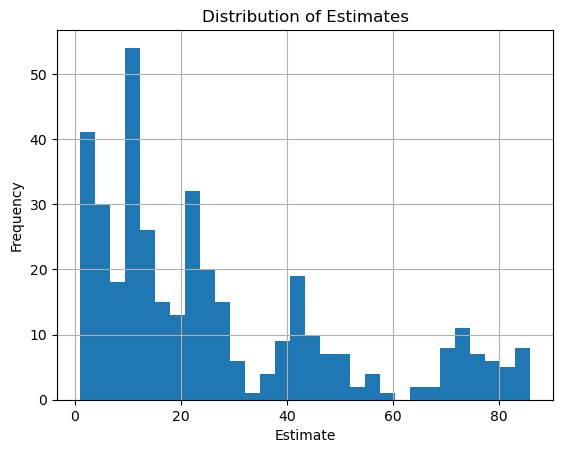

In [29]:
df['ESTIMATE'].hist(bins=30)
plt.title('Distribution of Estimates')
plt.xlabel('Estimate')
plt.ylabel('Frequency')
plt.show()


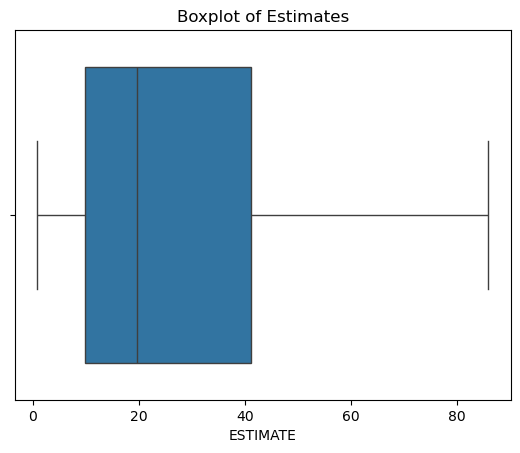

In [31]:
sns.boxplot(x=df['ESTIMATE'])
plt.title('Boxplot of Estimates')
plt.show()


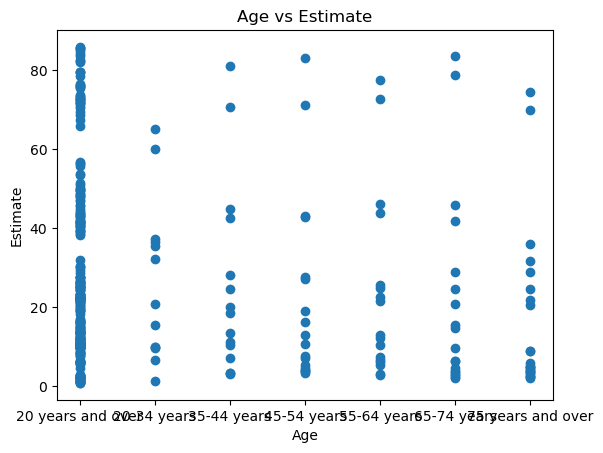

In [33]:
plt.scatter(df['AGE'], df['ESTIMATE'])
plt.title('Age vs Estimate')
plt.xlabel('Age')
plt.ylabel('Estimate')
plt.show()


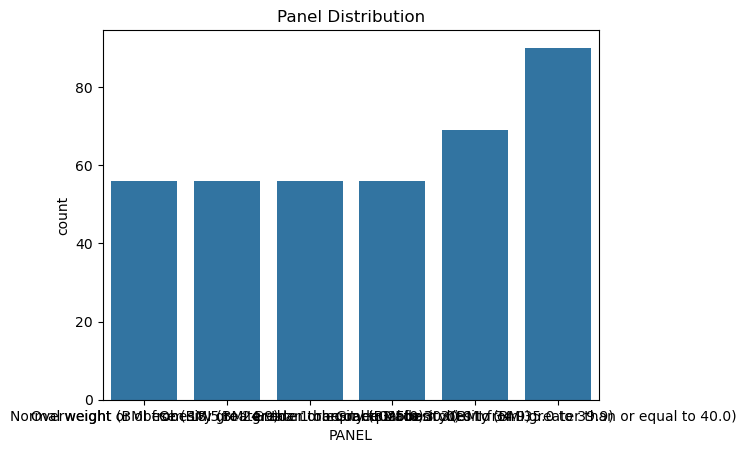

In [35]:
sns.countplot(x=df['PANEL'])
plt.title('Panel Distribution')
plt.show()


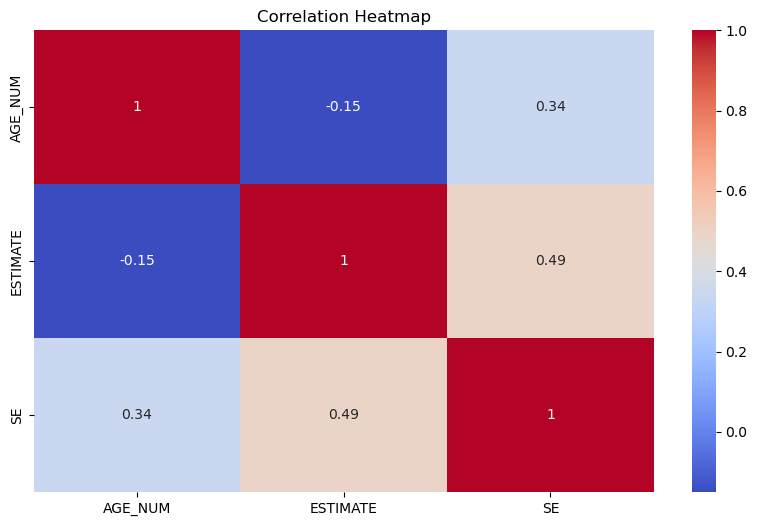

In [37]:
numeric_columns = ['AGE_NUM', 'ESTIMATE', 'SE']
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


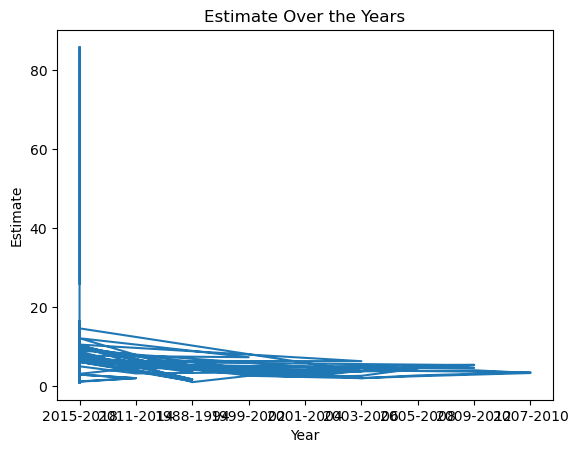

In [39]:
plt.plot(df['YEAR'], df['ESTIMATE'])
plt.title('Estimate Over the Years')
plt.xlabel('Year')
plt.ylabel('Estimate')
plt.show()
